# Exercícios de Inteligência Artificial

Este notebook contém as soluções para os exercícios de Inteligência Artificial.

## Questão 1: Regressão Linear

Solução de Mínimos Quadrados:
Coeficiente angular (w1): 2.9599
Intercepto (w0): 4.8845
MSE (Mínimos Quadrados): 2.6148
Epoch [100/1000], Loss: 3.7556
Epoch [200/1000], Loss: 3.3975
Epoch [300/1000], Loss: 3.3908
Epoch [400/1000], Loss: 3.3907
Epoch [500/1000], Loss: 3.3907
Epoch [600/1000], Loss: 3.3907
Epoch [700/1000], Loss: 3.3907
Epoch [800/1000], Loss: 3.3907
Epoch [900/1000], Loss: 3.3907
Epoch [1000/1000], Loss: 3.3907

Solução da Rede Neural:
linear.weight: [[2.9598644]]
linear.bias: [4.884462]
MSE (Rede Neural): 2.6148


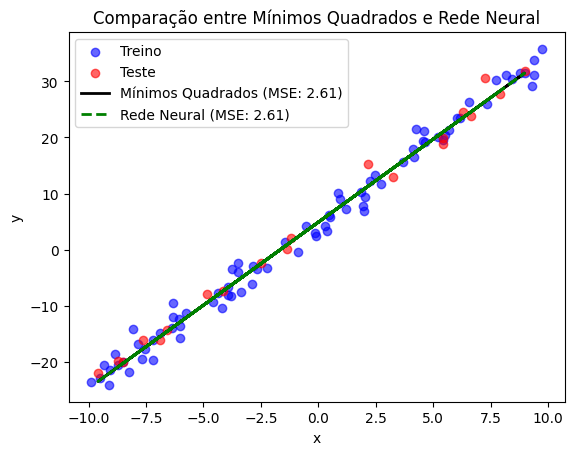

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim

# 1. Gerando conjunto de dados
np.random.seed(42)  # Definindo uma semente para garantir reprodutibilidade
x = np.random.uniform(-10, 10, 100)  # Gerando 100 valores aleatórios uniformemente distribuídos entre -10 e 10
epsilon = np.random.normal(0, 2, 100)  # Gerando ruído gaussiano com média 0 e desvio padrão 2
y = 3*x + 5 + epsilon  # Aplicando a equação da reta com ruído

# 2. Dividindo os dados em treino (80%) e teste (20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 3. Regressão Linear com Mínimos Quadrados
X_train = np.vstack([x_train, np.ones_like(x_train)]).T  # Criando a matriz de design com uma coluna de 1s para o bias
w = np.linalg.pinv(X_train) @ y_train  # Calculando os coeficientes usando a pseudo-inversa

# Apresentando a solução de mínimos quadrados
print(f"Solução de Mínimos Quadrados:")
print(f"Coeficiente angular (w1): {w[0]:.4f}")
print(f"Intercepto (w0): {w[1]:.4f}")

# Predição nos dados de teste
X_test = np.vstack([x_test, np.ones_like(x_test)]).T  # Criando a matriz de design para os dados de teste
y_pred = X_test @ w  # Fazendo previsões com o modelo de mínimos quadrados

# Cálculo do erro quadrático médio (MSE) para mínimos quadrados
mse = np.mean((y_test - y_pred)**2)
print(f'MSE (Mínimos Quadrados): {mse:.4f}')

# 4. Rede Neural com Gradiente Descendente
# Convertendo os dados de entrada para tensores do PyTorch
x_train_tensor = torch.tensor(x_train, dtype=torch.float32).view(-1, 1)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Definição da rede neural para regressão linear
class LinearRegressionNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)  # Camada linear com 1 entrada e 1 saída
    
    def forward(self, x):
        return self.linear(x)  # Aplicação da camada linear

# Inicializando o modelo, função de perda e otimizador
model = LinearRegressionNN()
criterion = nn.MSELoss()  # Função de perda: Erro Quadrático Médio (MSE)
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Otimizador: Gradiente Descendente Estocástico (SGD)

# Treinamento da rede neural
num_epochs = 1000  # Número de épocas de treinamento
for epoch in range(num_epochs):
    outputs = model(x_train_tensor)  # Passagem para frente (forward pass)
    loss = criterion(outputs, y_train_tensor)  # Cálculo da perda
    optimizer.zero_grad()  # Zerando os gradientes acumulados
    loss.backward()  # Retropropagação para calcular gradientes
    optimizer.step()  # Atualização dos pesos
    
    if (epoch+1) % 100 == 0:  # Exibindo a perda a cada 100 épocas
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Apresentando a solução da rede neural
print(f"\nSolução da Rede Neural:")
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"{name}: {param.data.numpy()}")

# Avaliação do modelo nos dados de teste
model.eval()  # Mudando para modo de avaliação
with torch.no_grad():  # Desativando o cálculo de gradientes para eficiência
    y_pred_nn = model(x_test_tensor).numpy()  # Fazendo previsões

# Cálculo do MSE para a rede neural
mse_nn = np.mean((y_test - y_pred_nn.flatten())**2)
print(f'MSE (Rede Neural): {mse_nn:.4f}')

# 5. Visualização dos resultados
plt.scatter(x_train, y_train, label='Treino', color='blue', alpha=0.6)  # Pontos de treino
plt.scatter(x_test, y_test, label='Teste', color='red', alpha=0.6)  # Pontos de teste
plt.plot(x_test, y_pred, label=f'Mínimos Quadrados (MSE: {mse:.2f})', color='black', linewidth=2)  # Linha da regressão por mínimos quadrados
plt.plot(x_test, y_pred_nn, label=f'Rede Neural (MSE: {mse_nn:.2f})', color='green', linewidth=2, linestyle='--')  # Linha da regressão pela rede neural
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparação entre Mínimos Quadrados e Rede Neural')
plt.show()


## Questão 2: Regressão Logística

Epoch [100/1000], Loss: 0.5160
Epoch [200/1000], Loss: 0.4342
Epoch [300/1000], Loss: 0.3896
Epoch [400/1000], Loss: 0.3624
Epoch [500/1000], Loss: 0.3444
Epoch [600/1000], Loss: 0.3318
Epoch [700/1000], Loss: 0.3225
Epoch [800/1000], Loss: 0.3154
Epoch [900/1000], Loss: 0.3100
Epoch [1000/1000], Loss: 0.3056
Acurácia no conjunto de teste: 0.8800


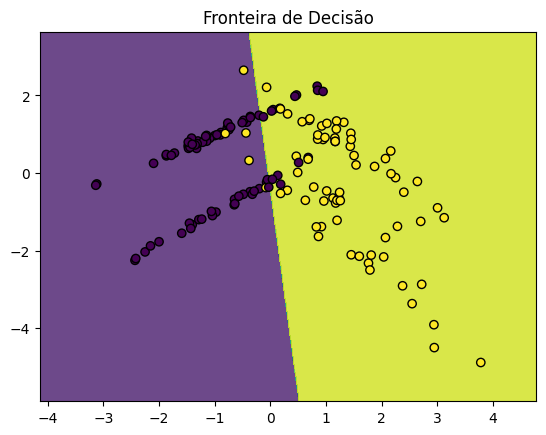

In [13]:

import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_classification

# Gerando dados
X, y = make_classification(n_samples=500, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo de Regressão Logística
class LogisticRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)
    
    def forward(self, x):
        return torch.sigmoid(self.linear(x))

# Instanciação e treinamento do modelo
model = LogisticRegression()
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Conversão de dados para tensores
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
y_train_torch = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

# Treinamento
for epoch in range(1000):
    optimizer.zero_grad()
    outputs = model(X_train_torch)
    loss = criterion(outputs, y_train_torch)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/1000], Loss: {loss.item():.4f}')

#Avaliação de dados de teste para tensorres
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_test_torch = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

#Avaliação do modelo
model.eval()
with torch.no_grad():
    y_pred = model(X_test_torch)
    y_pred_class = (y_pred > 0.5).float()
    accuracy = (y_pred_class == y_test_torch).float().mean()
    print(f'Acurácia no conjunto de teste: {accuracy.item():.4f}')

# Visualização da fronteira de decisão
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    with torch.no_grad():
        Z = model(grid)
        Z = (Z > 0.5).float().numpy()
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title('Fronteira de Decisão')
    plt.show()

plot_decision_boundary(model, X_test, y_test)


## Questão 3: MLP para Classificação

Training model with 5 hidden neurons
Epoch [100/1000], Train Loss: 0.3685, Val Loss: 0.4122
Epoch [200/1000], Train Loss: 0.2498, Val Loss: 0.2883
Epoch [300/1000], Train Loss: 0.2378, Val Loss: 0.2724
Epoch [400/1000], Train Loss: 0.2356, Val Loss: 0.2708
Epoch [500/1000], Train Loss: 0.2344, Val Loss: 0.2702
Epoch [600/1000], Train Loss: 0.2340, Val Loss: 0.2694
Epoch [700/1000], Train Loss: 0.2337, Val Loss: 0.2689
Epoch [800/1000], Train Loss: 0.2336, Val Loss: 0.2686
Epoch [900/1000], Train Loss: 0.2335, Val Loss: 0.2684
Epoch [1000/1000], Train Loss: 0.2334, Val Loss: 0.2682
Training model with 10 hidden neurons
Epoch [100/1000], Train Loss: 0.2550, Val Loss: 0.2976
Epoch [200/1000], Train Loss: 0.2368, Val Loss: 0.2741
Epoch [300/1000], Train Loss: 0.2348, Val Loss: 0.2709
Epoch [400/1000], Train Loss: 0.2341, Val Loss: 0.2697
Epoch [500/1000], Train Loss: 0.2338, Val Loss: 0.2690
Epoch [600/1000], Train Loss: 0.2336, Val Loss: 0.2686
Epoch [700/1000], Train Loss: 0.2335, Val Lo

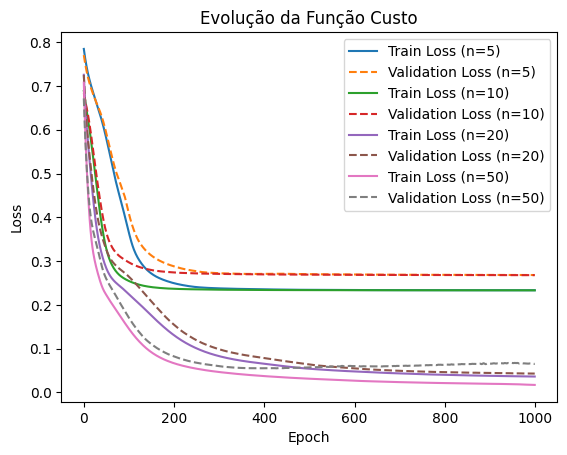

Melhor número de neurônios: 20
Epoch [100/1000], Train Loss: 0.2120, Val Loss: 0.2457
Epoch [200/1000], Train Loss: 0.1028, Val Loss: 0.1245
Epoch [300/1000], Train Loss: 0.0651, Val Loss: 0.0814
Epoch [400/1000], Train Loss: 0.0492, Val Loss: 0.0613
Epoch [500/1000], Train Loss: 0.0420, Val Loss: 0.0523
Epoch [600/1000], Train Loss: 0.0378, Val Loss: 0.0475
Epoch [700/1000], Train Loss: 0.0348, Val Loss: 0.0448
Epoch [800/1000], Train Loss: 0.0325, Val Loss: 0.0441
Epoch [900/1000], Train Loss: 0.0298, Val Loss: 0.0483
Epoch [1000/1000], Train Loss: 0.0274, Val Loss: 0.0494
Acurácia no conjunto de teste: 0.9733


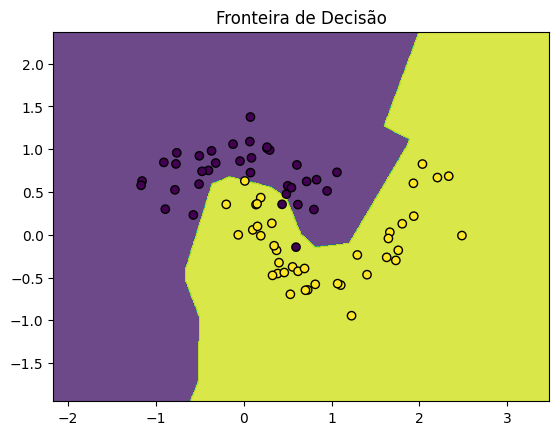

In [17]:

from sklearn.datasets import make_moons

# Gerando dados
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)

# Divisão dos dados em treino (70%), validação (15%) e teste (15%)
train_size = int(0.7 * len(X))
val_size = int(0.85 * len(X))

# Divisão de X
X_train, X_val, X_test = np.split(X, [train_size, val_size])

# Divisão de y
y_train, y_val, y_test = np.split(y, [train_size, val_size])

# Definição da MLP
class MLP(nn.Module):
    def __init__(self, n_hidden):
        super().__init__()
        self.hidden = nn.Linear(2, n_hidden)
        self.output = nn.Linear(n_hidden, 1)
    
    def forward(self, x):
        x = torch.relu(self.hidden(x))
        return torch.sigmoid(self.output(x))
    
#Função para treinar o modelo
def train_model(model, X_train, y_train, X_val, y_val, criterion, optimizer, num_epochs=1000):
    train_losses = []
    val_losses = []
    
    X_train_torch = torch.tensor(X_train, dtype=torch.float32)
    y_train_torch = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
    X_val_torch = torch.tensor(X_val, dtype=torch.float32)
    y_val_torch = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)
    
    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_torch)
        loss = criterion(outputs, y_train_torch)
        loss.backward()
        optimizer.step()
        
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val_torch)
            val_loss = criterion(val_outputs, y_val_torch)
        
        train_losses.append(loss.item())
        val_losses.append(val_loss.item())
        
        if (epoch+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')
    
    return train_losses, val_losses

# Diferentes números de neurônios na camada oculta
hidden_neurons = [5, 10, 20, 50]
results = {}

for n in hidden_neurons:
    print(f"Training model with {n} hidden neurons")
    model = MLP(n)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    train_losses, val_losses = train_model(model, X_train, y_train, X_val, y_val, criterion, optimizer)
    results[n] = {'train_losses': train_losses, 'val_losses': val_losses}

#Evolução da evolução da função custo
for n, loss_dict in results.items():
    plt.plot(loss_dict['train_losses'], label=f'Train Loss (n={n})')
    plt.plot(loss_dict['val_losses'], label=f'Validation Loss (n={n})', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Evolução da Função Custo')
plt.legend()
plt.show()

#Escolha do melhor número de neurônios
best_n = min(results, key=lambda n: min(results[n]['val_losses']))
print(f"Melhor número de neurônios: {best_n}")

#Avaliação do modelo escolhido no conjunto de testes
# Treinamento do modelo escolhido
best_model = MLP(best_n)
criterion = nn.BCELoss()
optimizer = optim.Adam(best_model.parameters(), lr=0.01)
train_losses, val_losses = train_model(best_model, X_train, y_train, X_val, y_val, criterion, optimizer)

# Avaliação no conjunto de teste
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_test_torch = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

best_model.eval()
with torch.no_grad():
    y_pred = best_model(X_test_torch)
    y_pred_class = (y_pred > 0.5).float()
    accuracy = (y_pred_class == y_test_torch).float().mean()
    print(f'Acurácia no conjunto de teste: {accuracy.item():.4f}')

# Visualização da fronteira de decisão
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    with torch.no_grad():
        Z = model(grid)
        Z = (Z > 0.5).float().numpy()
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title('Fronteira de Decisão')
    plt.show()

plot_decision_boundary(best_model, X_test, y_test)


## Questão 4: Classificação Multiclasse com MNIST

Epoch [1/10], Loss: 0.4399
Epoch [2/10], Loss: 0.2095
Epoch [3/10], Loss: 0.1529
Epoch [4/10], Loss: 0.1216
Epoch [5/10], Loss: 0.1036
Epoch [6/10], Loss: 0.0902
Epoch [7/10], Loss: 0.0778
Epoch [8/10], Loss: 0.0711
Epoch [9/10], Loss: 0.0586
Epoch [10/10], Loss: 0.0572
Acurácia no conjunto de teste: 96.52%


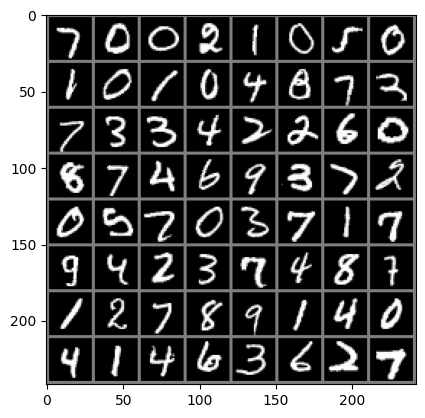

Classes previstas:  7 0 0 2 1 0 8 0 1 0 1 0 4 8 7 2 7 3 3 4 2 2 6 0 8 7 4 6 9 8 7 2 0 5 7 0 3 7 1 7 9 4 2 3 7 4 8 7 1 2 7 8 4 1 4 0 4 1 4 6 3 6 2 7


In [20]:

from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import torchvision

# Carregamento do dataset MNIST
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
dataset = datasets.MNIST(root="./data", train=True, transform=transform, download=True)

# Divisão em treino (80%) e teste (20%)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Definição da rede neural
class MNIST_MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)
    
#Função de perda e otimizador
model = MNIST_MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

#Treinamento de rede por 10 épocas
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

#Avaliação da Rede no Conjunto de Teste
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Acurácia no conjunto de teste: {100 * correct / total:.2f}%')

#Exibição de algumas previsões
def imshow(img):
    img = img / 2 + 0.5  # Desnormalizar
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Obter algumas imagens do conjunto de teste
dataiter = iter(test_loader)
images, labels = next(dataiter)

# Mostrar as imagens
imshow(torchvision.utils.make_grid(images))

# Fazer previsões
outputs = model(images)
_, predicted = torch.max(outputs, 1)

# Mostrar as previsões
print('Classes previstas: ', ' '.join(f'{predicted[j]}' for j in range(len(images))))